# Programação Genética

**Pós Graduação em Inteligência Artificial - IFMG**

**Autor**: Alexandre Fortes Santana
**Professor**: Carlos Alexandre

**Implementação de operadores de mutação e crossover customizados para um problema específico.**

*Return to Basics*: Devido à falta de tempo disponível, este trabalho de programação genética tem como foco a aplicação dos fundamentos, e não necessariamente a resolução de um problema real. Para abordar um problema real de forma consistente, é essencial dedicar uma quantidade significativa de tempo para entender profundamente o problema antes de aplicar qualquer solução. Portanto, escolhi um problema que permita a aplicação dos conceitos em um curto período de tempo, com o objetivo de aprender os fundamentos de maneira eficaz.

### Conceitos Fundamentais dos Algoritmos Genéticos:

- É uma abordagem para encontrar soluções para problemas, inspirada na biologia e na evolução.
- É uma variante popular de algoritmos evolutivos.
- Começa com um conjunto de soluções aleatórias (ou boas, se houver conhecimento prévio do domínio).
- As soluções são avaliadas iterativamente.
- As melhores soluções são selecionadas, cruzadas e mutadas.
- O processo é repetido um número fixo de vezes (gerações) ou até que uma solução ideal seja encontrada.
- Espera-se que ao longo do tempo, as soluções melhorem.

### Problema a ser resolvido

Usaremos programação genética encontrar o cubo máximo de um número inteiro no intervalo de 0 a 1.000.000. O intervalo é definido de forma aleatória.

Consideramos a função f(x) = x^3, onde x é um número inteiro no intervalo de 0 a 1.000.000. O objetivo é encontrar o valor de x que maximize o resultado da função, ou seja, o cubo máximo de um número inteiro nesse intervalo.

Representando as soluções como árvores de expressão, onde cada nó da árvore representa uma operação matemática ou uma variável (x).

(^ x 3)

### Visão geral do algoritmo:

- Gerar um conjunto inicial de soluções.
- Avaliar a qualidade das soluções.
- Selecionar algumas soluções para gerar novas soluções, buscando melhorias.
- Criar pares de soluções selecionadas para gerar novas soluções.
- Realizar pequenas alterações aleatórias nas novas soluções geradas.
- Substituir o conjunto anterior pelas novas soluções geradas.
- Continuar o processo até encontrar uma solução adequada, preferencialmente, antes de chegar ao fim do semestre letivo.

## Indivíduos

In [2]:
# O método "decode" converte uma string binária em um número inteiro. 
# O método retorna o valor inteiro da conversão elevda ao cubo

class GenotypeDecoder:
    
    def decode(self, genotype: str):
        binary_number = int(genotype, 2)  # Converte a string binária para um número inteiro
        decoded_number = binary_number ** 3  # Eleva o número ao cubo
        return decoded_number
    
class FitnessEvaluator:
    
    def __init__(self, genotype_decoder: GenotypeDecoder):
        self.genotype_decoder = genotype_decoder
        
    def evaluate(self, genotype: str):
        decoded_value = self.genotype_decoder.decode(genotype)  # Decodifica o genótipo
        return decoded_value

In [3]:
# Teste
# Criando uma instância do decodificador de genótipo
decoder = GenotypeDecoder()

# Criando uma instância do avaliador de aptidão (fitness evaluator) e passando o decodificador como argumento
evaluator = FitnessEvaluator(decoder)

# Genótipo a ser avaliado
genotype = "1010"

# Avaliando o genótipo utilizando o avaliador de aptidão
result = evaluator.evaluate(genotype)

# Exibindo o resultado
print("Resultado da avaliação:", result)


Resultado da avaliação: 1000


A classe `Individual` cria os indivíduos do algoritmo, armazenando informações sobre o genótipo e a aptidão de cada um.

In [4]:
class Individual:
    # atribuir os valores iniciais do genótipo e da aptidão para cada instância de indivíduo
    def __init__(self, genotype: str, fitness: int): 
        self.genotype = genotype
        self.fitness = fitness

    # retornar uma representação em string do indivíduo, combinando genótipo e a aptidão
    def __repr__(self):
        return f"Individual/genotype = {self.genotype} Fitness = {self.fitness}"


In [5]:
# Teste
# Criando instâncias de objetos Individual
individual1 = Individual("010101", 75)
individual2 = Individual("110011", 92)

# Imprimindo a representação dos objetos Individual
print(individual1)
print(individual2)


Individual/genotype = 010101 Fitness = 75
Individual/genotype = 110011 Fitness = 92


A classe `IndividualFactory` é responsável por criar instâncias da classe `Individual`. Essa "fábrica de indivíduos" recebe dois parâmetros em seu construtor: `genotype_length`, que indica o comprimento do genótipo, e `fitness_evaluator`, que é uma instância de `FitnessEvaluator` responsável por avaliar o *fitness* de um genótipo.

A fábrica de indivíduos possui três métodos principais:

1. O método `with_random_genotype` gera genótipos aleatórios, com base no comprimento especificado. Em seguida, o método avalia o fitness desse genótipo usando o objeto `fitness_evaluator` e retorna uma nova instância de `Individual` com o genótipo gerado e o fitness avaliado. Método usado como ponto de partida da evolução.

2. O método `with_set_genotype` recebe um genótipo como parâmetro e avalia seu fitness usando o objeto `fitness_evaluator`. Em seguida, retorna uma nova instância de `Individual` com o genótipo especificado e o fitness avaliado. Método usado para a reprodução.

3. O método `with_minimal_fitness` cria um genótipo composto apenas de zeros e avalia seu fitness usando o objeto `fitness_evaluator`.

Essa fábrica de indivíduos permite criar diferentes instâncias de `Individual` com genótipos aleatórios, genótipos específicos ou genótipos mínimos, com seus respectivos fitness avaliados. Isso é útil para a criação de populações iniciais em algoritmos genéticos, onde diferentes indivíduos são necessários para a evolução e otimização dos genótipos ao longo das gerações.

In [6]:
import random
class IndividualFactory:
    
    def __init__(self, genotype_length: int, fitness_evaluator: FitnessEvaluator):
        self.genotype_length = genotype_length
        self.fitness_evaluator = fitness_evaluator
        self.binary_string_format = f"{{:0{self.genotype_length}b}}"
    
    def with_random_genotype(self):
        genotype_max_value = 2 ** self.genotype_length
        random_genotype = self.binary_string_format.format(random.randint(0, genotype_max_value))
        fitness = self.fitness_evaluator.evaluate(random_genotype)
        return Individual(random_genotype, fitness)
    
    def with_set_genotype(self, genotype: str):
        fitness = self.fitness_evaluator.evaluate(genotype)
        return Individual(genotype, fitness)
    
    def with_minimal_fitness(self):
        minimal_fitness_genotype = self.binary_string_format.format(0)
        fitness = self.fitness_evaluator.evaluate(minimal_fitness_genotype)
        return Individual(minimal_fitness_genotype, fitness)


In [7]:
# Teste:

decoder = GenotypeDecoder()
fitness_evaluator = FitnessEvaluator(decoder)

# Criando uma instância de IndividualFactory com um comprimento de genótipo de 4
individual_factory = IndividualFactory(4, fitness_evaluator)

# Criando diferentes indivíduos usando os métodos da IndividualFactory
random_individual = individual_factory.with_random_genotype()
set_individual = individual_factory.with_set_genotype('1010')
minimal_fitness_individual = individual_factory.with_minimal_fitness()

# Imprimindo os indivíduos criados
print(random_individual)
print(set_individual)
print(minimal_fitness_individual)

Individual/genotype = 0101 Fitness = 125
Individual/genotype = 1010 Fitness = 1000
Individual/genotype = 0000 Fitness = 0


A classe `Population` é uma coleção de `Individual`s. Ela fornece um método, `get_the_fittest`, para obter os indivíduos mais aptos. A classe `PopulationFactory` fornece métodos para criar populações com indivíduos aleatórios, com indivíduos especificados e com indivíduos de aptidão mínima.

In [8]:
class Population:
    def __init__(self, individuals):
        self.individuals = individuals
        
    def get_the_fittest(self, n: int):
        self.__sort_by_fitness()
        return self.individuals[:n]
        
    def __sort_by_fitness(self):
        self.individuals.sort(key=lambda individual: individual.fitness, reverse=True)
    
class PopulationFactory:
    def __init__(self, individual_factory: IndividualFactory):
        self.individual_factory = individual_factory
        
    def with_random_individuals(self, size: int):
        individuals = [self.individual_factory.with_random_genotype() for _ in range(size)]
        return Population(individuals)
    
    def with_individuals(self, individuals):
        return Population(individuals)
    
    def with_minimal_fitness_individuals(self, size: int):
        individuals = [self.individual_factory.with_minimal_fitness() for _ in range(size)]
        return Population(individuals)


In [9]:
# Teste:

# Exemplo de uso da classe PopulationFactory para criar uma população com indivíduos aleatórios
individual_factory = IndividualFactory(genotype_length=8, fitness_evaluator=fitness_evaluator)
population_factory = PopulationFactory(individual_factory)

# Criar uma população com 5 indivíduos aleatórios
population_random = population_factory.with_random_individuals(size=5)

# Imprimir os indivíduos da população
for individual in population_random.individuals:
    print(individual)

# Exemplo de uso da classe PopulationFactory para criar uma população com indivíduos de fitness mínimo
population_minimal_fitness = population_factory.with_minimal_fitness_individuals(size=3)

# Obter os 2 indivíduos mais aptos da população
fittest_individuals = population_minimal_fitness.get_the_fittest(n=2)

# Imprimir os indivíduos mais aptos
for individual in fittest_individuals:
    print(individual)

Individual/genotype = 10001010 Fitness = 2628072
Individual/genotype = 01011010 Fitness = 729000
Individual/genotype = 01011001 Fitness = 704969
Individual/genotype = 01101100 Fitness = 1259712
Individual/genotype = 10011011 Fitness = 3723875
Individual/genotype = 00000000 Fitness = 0
Individual/genotype = 00000000 Fitness = 0


## Seleção Natural

O primeiro passo para criar uma nova geração de soluções é selecionar indivíduos da população atual que se tornarão os pais. Os novos indivíduos são chamados de descendentes. A decisão de quais indivíduos manter para a próxima geração é chamada de seleção de sobrevivência.

Usaremos o Stochastic Universal Sampling (SUS), de forma que a probabilidade de um indivíduo se tornar um pai dependerá diretamente de sua aptidão. 

O SUS também ajuda a garantir que a diversidade da população seja preservada e que indivíduos com alta aptidão sejam selecionados para cruzar.

A classe `ParentSelector`, que é responsável por selecionar os pais da população para a próxima geração em um algoritmo genético.

A função `select_parents` recebe como entrada um objeto `Population`, que contém uma lista de indivíduos (representados pela classe `Individual`). O objetivo é selecionar os pais com base na aptidão (fitness) de cada indivíduo.

A função começa calculando o valor total de aptidão somando as aptidões de todos os indivíduos na população. Em seguida, cria uma lista chamada `fitness_scale`, que armazena a escala de aptidão. Cada valor na escala é a soma das aptidões dos indivíduos anteriores na lista.

A partir daí, é criado o "pool de acasalamento" (`mating_pool`), uma lista vazia onde os pais selecionados serão armazenados. O número de pais a serem selecionados é igual ao tamanho da população.

Em seguida, é calculado o tamanho do passo na escala de aptidão (`fitness_step`), que determina a rapidez com que avançamos ao longo da escala de aptidão. Também é gerado um deslocamento aleatório (`random_offset`) dentro do intervalo do tamanho do passo.

O próximo passo é iterar pelo número de pais desejado. Para cada iteração, um ponteiro de aptidão atual (`current_fitess_pointer`) é atualizado adicionando o tamanho do passo. Um índice de posição na escala de aptidão anterior (`last_fitness_scale_position`) é mantido para otimizar a busca.

Dentro do loop, é feita uma busca na escala de aptidão para encontrar o índice que corresponde à posição do ponteiro de aptidão atual. O indivíduo correspondente a esse índice é adicionado ao pool de acasalamento. O índice encontrado é armazenado como a última posição na escala de aptidão para melhorar a eficiência na próxima iteração.

Ao final, a função retorna o pool de acasalamento contendo os pais selecionados.

Essa seleção de pais é baseada na aptidão dos indivíduos, onde os indivíduos com maior aptidão têm mais probabilidade de serem selecionados, mas ainda existe uma aleatoriedade devido ao deslocamento inicial e ao passo na escala de aptidão.

In [10]:
class ParentSelector:
        
    def select_parents(self, population: Population):
        total_fitness = sum(individual.fitness for individual in population.individuals)
        fitness_scale = [individual.fitness for individual in population.individuals]
        
        for index in range(1, len(fitness_scale)):
            fitness_scale[index] += fitness_scale[index - 1]
            
        mating_pool = []
        number_of_parents = len(population.individuals)
        fitness_step = total_fitness / number_of_parents
        random_offset = random.uniform(0, fitness_step)
        
        current_fitess_pointer = random_offset
        last_fitness_scale_position = 0
        for _ in range(number_of_parents):
            for fitness_scale_position in range(last_fitness_scale_position, len(fitness_scale)):
                if fitness_scale[fitness_scale_position] >= current_fitess_pointer:
                    mating_pool.append(population.individuals[fitness_scale_position])
                    last_fitness_scale_position = fitness_scale_position
                    break
            current_fitess_pointer += fitness_step
        
        return mating_pool


In [11]:
# Criando a população com 5 indivíduos
individuals = []
for i in range(5):
    genotype = ''.join(random.choices(['0', '1'], k=4))
    fitness = random.randint(1, 10)
    individuals.append(Individual(genotype, fitness))
    
population = Population(individuals)

# Criando um objeto da classe ParentSelector
parent_selector = ParentSelector()

# Selecionando os pais da população
mating_pool = parent_selector.select_parents(population)

# Exibindo os pais selecionados
for parent in mating_pool:
    print(parent)

Individual/genotype = 0011 Fitness = 10
Individual/genotype = 0011 Fitness = 10
Individual/genotype = 0011 Fitness = 9
Individual/genotype = 0101 Fitness = 6
Individual/genotype = 0000 Fitness = 7


### Cruzamento e Mutação

Precisamos transferir as características que tornam um indivíduo apto para a próxima geração. 

Vamos combinar os genótipos de dois indivíduos pais em um novo par. Por exemplo, se os pais têm os genótipos 001111011111 e 111100001111, selecionamos um ponto de crossover aleatório entre 0 e o comprimento do genótipo:

crossover: 5

***G1a**: 00111	**G1b**: 1011111*

***G2a**: 11110	**G2b**: 0001111*

Agora criamos um novo par de genótipos combinando a primeira parte do primeiro genótipo (1a) com a segunda parte do segundo (2b) e a primeira parte do segundo genótipo (2a) com a segunda parte do primeiro genótipo (1b):

***Descendente 1 (G1a+G2b)**: 001110001111*

***Descendente 2 (G2a+G1b)**: 111101011111*

Os novos genótipos se tornarão os descendentes.

#### Cruzamento

In [12]:
class SinglePointCrossover:
    
    def __init__(self, individual_factory):
        self.individual_factory = individual_factory
    
    def crossover(self, parent_1, parent_2):
        crossover_point = random.randint(0, len(parent_1.genotype))
        genotype_1 = self.__new_genotype(crossover_point, parent_1, parent_2)
        genotype_2 = self.__new_genotype(crossover_point, parent_2, parent_1)
        child_1 = self.individual_factory.with_set_genotype(genotype=genotype_1)
        child_2 = self.individual_factory.with_set_genotype(genotype=genotype_2)
        return child_1, child_2
    
    def __new_genotype(self, crossover_point, parent_1, parent_2):
        return parent_1.genotype[:crossover_point] + parent_2.genotype[crossover_point:]

In [13]:
# Teste

# Cria uma instância do IndividualFactory
individual_factory = IndividualFactory(genotype_length=10, fitness_evaluator=FitnessEvaluator(GenotypeDecoder()))

# Cria uma instância do SinglePointCrossover
crossover = SinglePointCrossover(individual_factory=individual_factory)

# Cria dois indivíduos pais
parent_1 = individual_factory.with_random_genotype()
parent_2 = individual_factory.with_random_genotype()

# Realiza o crossover entre os pais
child_1, child_2 = crossover.crossover(parent_1=parent_1, parent_2=parent_2)

# Imprime os genótipos dos pais e dos filhos
print("Pai 1:", parent_1.genotype)
print("Pai 2:", parent_2.genotype)
print("Filho 1:", child_1.genotype)
print("Filho 2:", child_2.genotype)

Pai 1: 1110111101
Pai 2: 0000111111
Filho 1: 1110111111
Filho 2: 0000111101


#### Mutação

In [14]:
class Mutator:
    
    def __init__(self, individual_factory: IndividualFactory):
        self.individual_factory = individual_factory
        
    def mutate(self, individual: Individual):
        # Cria uma cópia do genótipo do indivíduo
        mutated_genotype = list(individual.genotype)
        
        # Calcula a probabilidade de mutação de cada gene
        mutation_probability = 1 / len(individual.genotype)
        
        # Percorre cada gene do genótipo
        for index, gene in enumerate(individual.genotype):
            # Verifica se ocorre a mutação do gene com base na probabilidade
            if random.random() < mutation_probability:
                # Inverte o valor do gene (0 -> 1, 1 -> 0)
                mutated_genotype[index] = '0' if gene == '1' else '1'
        
        # Cria um novo indivíduo com o genótipo mutado e retorna
        return self.individual_factory.with_set_genotype(genotype="".join(mutated_genotype))

In [15]:
# Criação de uma instância da IndividualFactory
individual_factory = IndividualFactory(genotype_length=8, fitness_evaluator=FitnessEvaluator(GenotypeDecoder()))

# Criação de uma instância do Mutator
mutator = Mutator(individual_factory)

# Criação de um indivíduo inicial
initial_genotype = "01010101"
initial_individual = individual_factory.with_set_genotype(genotype=initial_genotype)

# Aplicação da mutação no indivíduo
mutated_individual = mutator.mutate(initial_individual)

# Exibição dos resultados
print("Indivíduo inicial:")
print(initial_individual)
print("Indivíduo mutado:")
print(mutated_individual)


Indivíduo inicial:
Individual/genotype = 01010101 Fitness = 614125
Indivíduo mutado:
Individual/genotype = 01010001 Fitness = 531441


#### Reprodutor

O algoritmo repete as seguintes etapas a cada iteração:

1. Seleciona dois indivíduos aleatórios da população.
2. Cruza os genótipos dos indivíduos selecionados para criar dois novos indivíduos.
3. Muta os genótipos dos novos indivíduos.
4. Adiciona os novos indivíduos à população da próxima geração.

In [16]:
class Breeder:
    
    def __init__(self, single_point_crossover: SinglePointCrossover, mutator: Mutator):
        self.single_point_crossover = single_point_crossover
        self.mutator = mutator
        
    def produce_offspring(self, parents):
        offspring = []
        number_of_parents = len(parents)
        for index in range(int(number_of_parents / 2)):
            parent_1, parent_2 = self.__pick_random_parents(parents, number_of_parents)
            
            # Realiza o cruzamento dos pais para gerar dois filhos
            child_1, child_2 = self.single_point_crossover.crossover(parent_1, parent_2)
            
            # Aplica a mutação nos filhos gerados
            child_1_mutated = self.mutator.mutate(child_1)
            child_2_mutated = self.mutator.mutate(child_2)
            
            # Adiciona os filhos mutados à lista de descendentes
            offspring.extend((child_1_mutated, child_2_mutated))
        
        return offspring
    
    def __pick_random_parents(self, parents, number_of_parents: int):
        # Seleciona dois pais aleatoriamente da lista de pais
        parent_1 = parents[random.randint(0, number_of_parents - 1)]
        parent_2 = parents[random.randint(0, number_of_parents - 1)]
        return parent_1, parent_2

In [17]:
# Teste

# Criação de uma instância da classe IndividualFactory
individual_factory = IndividualFactory(genotype_length=10, fitness_evaluator=FitnessEvaluator(GenotypeDecoder()))

# Criação de uma instância da classe GenotypeDecoder
genotype_decoder = GenotypeDecoder()

# Criação de uma instância da classe FitnessEvaluator
fitness_evaluator = FitnessEvaluator(genotype_decoder=genotype_decoder)

# Criação de uma instância da classe SinglePointCrossover
single_point_crossover = SinglePointCrossover(individual_factory=individual_factory)

# Criação de uma instância da classe Mutator
mutator = Mutator(individual_factory=individual_factory)

# Criação de uma instância da classe Breeder
breeder = Breeder(single_point_crossover=single_point_crossover, mutator=mutator)

# Criação de uma população inicial de indivíduos
population = PopulationFactory(individual_factory=individual_factory).with_random_individuals(size=10)

# Produção da descendência a partir da população atual
offspring = breeder.produce_offspring(parents=population.individuals)

# Exemplo de utilização da descendência gerada
for individual in offspring:
    print(individual)

Individual/genotype = 1100010110 Fitness = 493039000
Individual/genotype = 0110101000 Fitness = 76225024
Individual/genotype = 1011001011 Fitness = 365525875
Individual/genotype = 1001110110 Fitness = 250047000
Individual/genotype = 1000010011 Fitness = 149721291
Individual/genotype = 0100111011 Fitness = 31255875
Individual/genotype = 1001010100 Fitness = 211708736
Individual/genotype = 1010010101 Fitness = 288804781
Individual/genotype = 0111101011 Fitness = 118370771
Individual/genotype = 0000010111 Fitness = 12167


#### Ambiente de evolução

O algoritmo é responsável por iniciar a população e, a cada chamada ao método de atualização, ele seleciona os pais, produz descendentes e substitui a população atual por uma nova. Ele também fornece um método para obter os indivíduos mais aptos da população atual.

Para usar o algoritmo, precisamos instanciar todas as partes e definir alguns parâmetros, como o número de gerações e o comprimento do genótipo. Em seguida, podemos iterar o algoritmo até encontrarmos uma solução.

In [18]:
class Environment:
    
    def __init__(self, 
                 population_size: int, 
                 parent_selector: ParentSelector, 
                 population_factory: PopulationFactory, 
                 breeder: Breeder):
        self.population_factory = population_factory
        self.population = self.population_factory.with_random_individuals(size=population_size)
        self.parent_selector = parent_selector
        self.breeder = breeder
    
    def update(self):
        # Seleciona os pais da população atual usando o seletor de pais
        parents = self.parent_selector.select_parents(self.population)
        # Produz a próxima geração a partir dos pais selecionados usando o criador de descendência
        next_generation = self.breeder.produce_offspring(parents)
        # Atualiza a população para a próxima geração usando a fábrica de população
        self.population = self.population_factory.with_individuals(next_generation)
        
    def get_the_fittest(self, n: int):
        # Obtém os indivíduos mais aptos da população atual
        return self.population.get_the_fittest(n)

# Rodando a Solução

Vencedor!
Parou na geração 2224. Indivíduo mais apto: 
Individual/genotype = 11111111111111111111 Fitness = 1152918206075109375


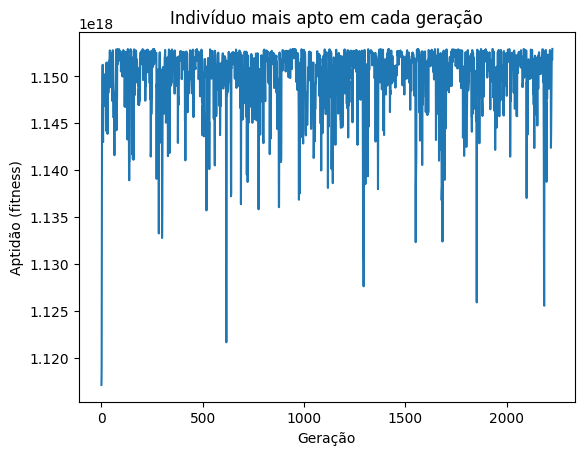

In [22]:
TOTAL_GENERATIONS = 100000000000
POPULATION_SIZE = 100
GENOTYPE_LENGTH = 20

current_generation = 1

# Inicialização dos componentes necessários
genotype_decoder = GenotypeDecoder()  # Decodificador do genótipo
fitness_evaluator = FitnessEvaluator(genotype_decoder)  # Avaliador de aptidão
individual_factory = IndividualFactory(GENOTYPE_LENGTH, fitness_evaluator)  # Fábrica de indivíduos
population_factory = PopulationFactory(individual_factory)  # Fábrica de população
single_point_crossover = SinglePointCrossover(individual_factory)  # Operador de crossover
mutator = Mutator(individual_factory)  # Mutador
breeder = Breeder(single_point_crossover, mutator)  # Criador de descendência
parent_selector = ParentSelector()  # Seletor de pais

# Criação do ambiente de evolução
environment = Environment(POPULATION_SIZE, parent_selector, population_factory, breeder)

highest_fitness_list = []  # Lista para armazenar a aptidão mais alta de cada geração
while current_generation <= TOTAL_GENERATIONS:
    fittest = environment.get_the_fittest(1)[0]  # Obtém o indivíduo mais apto da população atual
    highest_fitness_list.append(fittest.fitness)  # Armazena a aptidão do indivíduo mais apto
    if "0" not in fittest.genotype:  # Verifica se encontrou a solução desejada
        print("Vencedor!")
        break
    environment.update()  # Atualiza a população para a próxima geração
    current_generation += 1

print("Parou na geração " + str(current_generation - 1) + ". Indivíduo mais apto: ")
print(fittest)

import matplotlib.pyplot as plt

generations = range(1, len(highest_fitness_list) + 1)
plt.plot(generations, highest_fitness_list)
plt.title('Indivíduo mais apto em cada geração')
plt.xlabel('Geração')
plt.ylabel('Aptidão (fitness)')
plt.show()